In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

import sklearn
print(sklearn.__version__)

1.0.2


In [24]:

# Load the CSV file
data = pd.read_csv('drag_traj5.csv')

# Extract the matrix of data
matrix = data.values

data.head()

# Pivot the DataFrame
data = data.melt(id_vars=['vel'], var_name='drag', value_name='x').astype('float64').dropna(axis= 0, how='any')

# Sort the DataFrame by 'foo' column
data.sort_values(['vel','drag'], ignore_index=True, inplace=True)

#pivoted_df = pivoted_df.dropna(subset=['c_l'])

# Display the pivoted DataFrame
print(data)
data.dtypes

,vel,10,20,30
0,905,216,87,50
1,1109,302,193,145
2,1316,375,278,240
3,1523,427,337,288
4,1729,462,376,330


       vel  drag      x
0    905.0  10.0  216.0
1    905.0  20.0   87.0
2    905.0  30.0   50.0
3   1109.0  10.0  302.0
4   1109.0  20.0  193.0
5   1109.0  30.0  145.0
6   1316.0  10.0  375.0
7   1316.0  20.0  278.0
8   1316.0  30.0  240.0
9   1523.0  10.0  427.0
10  1523.0  20.0  337.0
11  1523.0  30.0  288.0
12  1729.0  10.0  462.0
13  1729.0  20.0  376.0
14  1729.0  30.0  330.0
15  1892.0  10.0  520.0
16  1892.0  20.0  406.0
17  1892.0  30.0  290.0


vel     float64
drag    float64
x       float64
dtype: object

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'vel')

Text(0.5, 0, 'drag')

Text(0.5, 0.92, 'traj')

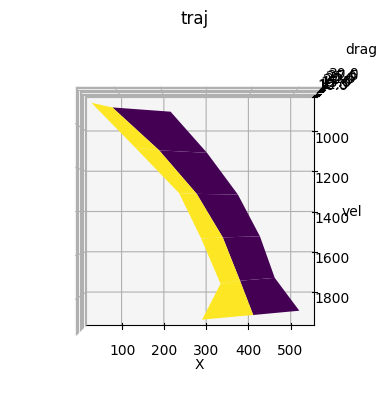

In [25]:
# Reshape the DataFrame into a pivot table
pivot_table = data.pivot(index='vel', columns='drag', values='x')

# Convert the data to a 2D numpy array
X = pivot_table.values


# Create the X and Y coordinate grids
D, V = np.meshgrid(pivot_table.columns, pivot_table.index)


# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface, ignoring NaN values
ax.plot_surface(X, V, D, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('vel')
ax.set_zlabel('drag')
ax.set_title('traj')


ax.invert_xaxis()

ax.view_init(90, 90)

# Show the plot
plt.show()

LinearRegression()

Text(0.5, 0, 'X_pred')

Text(0.5, 0.5, 'vel')

Text(0.5, 0, 'drag')

Text(0.5, 0.92, 'traj')

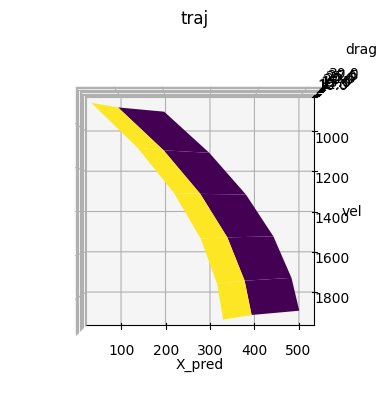

In [26]:
# Flatten the X, Y, and Z arrays
X_flat = X.flatten()
V_flat = V.flatten()
D_flat = D.flatten()


degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree, interaction_only=False)
VD_poly = poly_features.fit_transform(np.column_stack((V_flat, D_flat)))

# Perform polynomial regression
model = LinearRegression()
model.fit(VD_poly, X_flat)

# Generate predictions for the grid points
X_pred = model.predict(VD_poly)

# Reshape the predicted values back to a 2D array
X_pred = X_pred.reshape(X.shape)



# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface, ignoring NaN values
ax.plot_surface(X_pred, V, D, cmap='viridis')

# Set labels and title
ax.set_xlabel('X_pred')
ax.set_ylabel('vel')
ax.set_zlabel('drag')
ax.set_title('traj')


ax.invert_xaxis()

ax.view_init(90, 90)

# Show the plot
plt.show()

In [27]:
# Retrieve the coefficients from the trained model
coef = model.coef_
intercept = model.intercept_

# Define the equation for the prediction
equation = f"x = {intercept}"

for i, c in enumerate(coef[1:], start=1):
    power = poly_features.powers_[i]
    equation += f" + {c} * vel^{power[0]} * drag^{power[1]}"

print("Equation for the model prediction:")
print(equation)
print("Equation in python form:")
print(equation.replace('^','**'))

Equation for the model prediction:
x = -365.6282303867932 + 1.0003973495016918 * vel^1 * drag^0 + -15.409853981961241 * vel^0 * drag^1 + -0.00024196873768544958 * vel^2 * drag^0 + -0.0016156332438259542 * vel^1 * drag^1 + 0.24249999999981453 * vel^0 * drag^2
Equation in python form:
x = -365.6282303867932 + 1.0003973495016918 * vel**1 * drag**0 + -15.409853981961241 * vel**0 * drag**1 + -0.00024196873768544958 * vel**2 * drag**0 + -0.0016156332438259542 * vel**1 * drag**1 + 0.24249999999981453 * vel**0 * drag**2


In [28]:
def trajplot_x_vd(vel, drag):
    x = -232.2418634360448 + 0.8634282673851585 * vel**1 * drag**0 + -20.859660638014855 * vel**0 * drag**1 + -0.0002166827808686156 * vel**2 * drag**0 + 0.0020778810276278776 * vel**1 * drag**1 + 0.27083333333317644 * vel**0 * drag**2
    
    return x

Text(0.5, 0, 'X_pred')

Text(0.5, 0.5, 'vel')

Text(0.5, 0, 'drag')

Text(0.5, 0.92, 'traj')

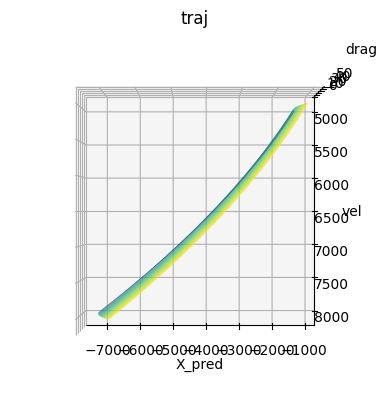

In [29]:
# Generate predictions for the grid points
V_ext = np.linspace(5000, 8000, 100)
D_ext = np.linspace(0, 50, 100)
V_ext, D_ext = np.meshgrid(V_ext, D_ext)
X_pred_ext = trajplot_x_vd(V_ext, D_ext)

# Reshape the predicted values back to a 2D array
X_pred_ext = X_pred_ext.reshape(V_ext.shape)



# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface, ignoring NaN values
ax.plot_surface(X_pred_ext, V_ext, D_ext, cmap='viridis')

# Set labels and title
ax.set_xlabel('X_pred')
ax.set_ylabel('vel')
ax.set_zlabel('drag')
ax.set_title('traj')


ax.invert_xaxis()

ax.view_init(90, 90)

# Show the plot
plt.show()

(0.0, 500.0)

(5000.0, 8000.0)

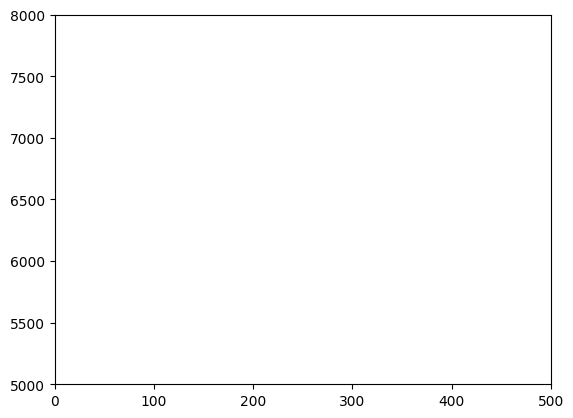

In [30]:
V_ext = np.linspace(5000, 8000, 100)

fig = plt.figure()
plt.plot(trajplot_x_vd(V_ext, 5), V_ext)
plt.plot(trajplot_x_vd(V_ext, 10), V_ext)
plt.plot(trajplot_x_vd(V_ext, 15), V_ext)
plt.plot(trajplot_x_vd(V_ext, 20), V_ext)
plt.plot(trajplot_x_vd(V_ext, 25), V_ext)
plt.plot(trajplot_x_vd(V_ext, 30), V_ext)
#plt.plot(trajplot_x_vd(V_ext, 40), V_ext)

plt.xlim([0, 500])
plt.ylim([5000, 8000])



    